In [1]:
import pandas as pd
import geopandas as gp

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import numpy as np

from scipy.stats import norm
import scipy.stats as stats
import pylab as pl

import libpysal
from spglm.glm import GLM
from spglm.family import Gaussian

In [2]:
'''data1 = pd.read_csv(r'D:\Accessibility_study\CorePlacesMay2020Release-CORE_POI-2020_04-2020-05-06\core_poi-part1.csv')
data2 = pd.read_csv(r'D:\Accessibility_study\CorePlacesMay2020Release-CORE_POI-2020_04-2020-05-06\core_poi-part2.csv')
data3 = pd.read_csv(r'D:\Accessibility_study\CorePlacesMay2020Release-CORE_POI-2020_04-2020-05-06\core_poi-part3.csv')
data4 = pd.read_csv(r'D:\Accessibility_study\CorePlacesMay2020Release-CORE_POI-2020_04-2020-05-06\core_poi-part4.csv')
data5 = pd.read_csv(r'D:\Accessibility_study\CorePlacesMay2020Release-CORE_POI-2020_04-2020-05-06\core_poi-part5.csv')'''

In [3]:
#data = pd.concat([data1, data2, data3, data4, data5], ignore_index = True) 
#data.to_csv(r'D:\Accessibility_study\poi_US.csv')

In [2]:
data= pd.read_csv(r'D:\Accessibility_study\poi_US.csv')

In [6]:
data_PA = data[data['region'] == "PA"]
data_OH = data[data['region'] == "OH"]
data_IL = data[data['region'] == "IL"]
data_CA = data[data['region'] == "CA"]
data_NY = data[data['region'] == "NY"]
data_TX = data[data['region'] == "TX"]
data_CO = data[data['region'] == "CO"]
data_OR = data[data['region'] == "OR"]

In [3]:
data_AZ = data[data['region'] == "AZ"]
data_WA = data[data['region'] == "WA"]
data_MA = data[data['region'] == "MA"]
data_WI = data[data['region'] == "WI"]
data_IA = data[data['region'] == "IA"]
data_UT = data[data['region'] == "UT"]
data_FL = data[data['region'] == "FL"]
data_MI = data[data['region'] == "MI"]
data_IN = data[data['region'] == "IN"]
data_NC = data[data['region'] == "NC"]
data_GA = data[data['region'] == "GA"]
data_TN = data[data['region'] == "TN"]
data_KY = data[data['region'] == "KY"]

In [8]:
data_MI.to_csv(r'D:\Accessibility_study\POI_states\poi_MI.csv')
data_IN.to_csv(r'D:\Accessibility_study\POI_states\poi_IN.csv')
data_NC.to_csv(r'D:\Accessibility_study\POI_states\poi_NC.csv')
data_GA.to_csv(r'D:\Accessibility_study\POI_states\poi_GA.csv')
data_TN.to_csv(r'D:\Accessibility_study\POI_states\poi_TN.csv')
data_KY.to_csv(r'D:\Accessibility_study\POI_states\poi_KY.csv')

In [7]:
data_IA.to_csv(r'D:\Accessibility_study\POI_states\poi_IA.csv')
data_UT.to_csv(r'D:\Accessibility_study\POI_states\poi_UT.csv')
data_FL.to_csv(r'D:\Accessibility_study\POI_states\poi_FL.csv')

# Read Data

In [43]:
data_OH = gp.read_file(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\Shapefiles\poi_OH.shp')
data_franklin = gp.read_file(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\Shapefiles\poi_franklin.shp')

# Ohio Data processing

In [15]:
data_OH.columns

Index(['Field1', 'safegraph_', 'parent_saf', 'location_n', 'safegraph1',
       'brands', 'top_catego', 'sub_catego', 'naics_code', 'latitude',
       'longitude', 'street_add', 'city', 'region', 'postal_cod', 'iso_countr',
       'phone_numb', 'open_hours', 'category_t', 'geometry'],
      dtype='object')

In [28]:
a = data_OH.naics_code.apply(lambda x: str(x))

In [36]:
sector = []
sec_code = []
for i in range(len(a)):
    if a[i][:2] == '11':
        sector.append('Agriculture, Forestry, Fishing and Hunting')
        sec_code.append ('11')
    elif a[i][:2] == '21':
        sector.append('Mining')
        sec_code.append ('21')
    elif a[i][:2] == '22':
        sector.append('Utilities')
        sec_code.append ('22')
    elif a[i][:2] == '23':
        sector.append('Construction')
        sec_code.append ('23')
    elif a[i][:2] == '31' or a[i][:2] == '32' or a[i][:2] == '33':
        sector.append('Manufacturing')
        sec_code.append ('31-33')
    elif a[i][:2] == '42':
        sector.append('Wholesale Trade')
        sec_code.append ('42')
    elif a[i][:2] == '44' or a[i][:2] == '45':
        sector.append('Retail Trade')
        sec_code.append ('44-45')
    elif a[i][:2] == '48' or a[i][:2] == '49':
        sector.append('Transportation and Warehousing')
        sec_code.append ('48-49')
    elif a[i][:2] == '51':
        sector.append('Information')
        sec_code.append ('51')
    elif a[i][:2] == '52':
        sector.append('Finance and Insurance')
        sec_code.append ('52')
    elif a[i][:2] == '53':
        sector.append('Real Estate and Leasing')
        sec_code.append ('53')
    elif a[i][:2] == '54':
        sector.append('Professional, Scientific and Technical Services')
        sec_code.append ('54')
    elif a[i][:2] == '55':
        sector.append('Management of Companies and Enterprises')
        sec_code.append ('55')
    elif a[i][:2] == '56':
        sector.append('Administrative Services')
        sec_code.append ('56')
    elif a[i][:2] == '61':
        sector.append('Educational Services')
        sec_code.append ('61')
    elif a[i][:2] == '62':
        sector.append('Health Care and Social Assistance')
        sec_code.append ('62')
    elif a[i][:2] == '71':
        sector.append('Arts, Entertainment and Recreation')
        sec_code.append ('71')
    elif a[i][:2] == '72':
        sector.append('Accomodation and Food Services')
        sec_code.append ('72')
    elif a[i][:2] == '81':
        sector.append('Other Services')
        sec_code.append ('81')
    elif a[i][:2] == '92':
        sector.append('Public Administration')
        sec_code.append ('92')
    else:
        sector.append('code not available')
        sec_code.append ('NA')
        
        


In [37]:
data_OH['sector'] = sector
data_OH['sec_code'] = sec_code

In [40]:
gdf = gp.GeoDataFrame(data_OH, geometry = data_OH.geometry)
gdf.to_file(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\Shapefiles\poi_OH_coded.shp', Driver = 'Esri Shapefile')

# Franklin Data processing

In [44]:
data_franklin.columns

Index(['Field1', 'safegraph_', 'parent_saf', 'location_n', 'safegraph1',
       'brands', 'top_catego', 'sub_catego', 'naics_code', 'latitude',
       'longitude', 'street_add', 'city', 'region', 'postal_cod', 'iso_countr',
       'phone_numb', 'open_hours', 'category_t', 'bus_type', 'geometry'],
      dtype='object')

In [45]:
a = data_franklin.naics_code.apply(lambda x: str(x))

In [46]:
sector = []
sec_code = []
for i in range(len(a)):
    if a[i][:2] == '11':
        sector.append('Agriculture, Forestry, Fishing and Hunting')
        sec_code.append ('11')
    elif a[i][:2] == '21':
        sector.append('Mining')
        sec_code.append ('21')
    elif a[i][:2] == '22':
        sector.append('Utilities')
        sec_code.append ('22')
    elif a[i][:2] == '23':
        sector.append('Construction')
        sec_code.append ('23')
    elif a[i][:2] == '31' or a[i][:2] == '32' or a[i][:2] == '33':
        sector.append('Manufacturing')
        sec_code.append ('31-33')
    elif a[i][:2] == '42':
        sector.append('Wholesale Trade')
        sec_code.append ('42')
    elif a[i][:2] == '44' or a[i][:2] == '45':
        sector.append('Retail Trade')
        sec_code.append ('44-45')
    elif a[i][:2] == '48' or a[i][:2] == '49':
        sector.append('Transportation and Warehousing')
        sec_code.append ('48-49')
    elif a[i][:2] == '51':
        sector.append('Information')
        sec_code.append ('51')
    elif a[i][:2] == '52':
        sector.append('Finance and Insurance')
        sec_code.append ('52')
    elif a[i][:2] == '53':
        sector.append('Real Estate and Leasing')
        sec_code.append ('53')
    elif a[i][:2] == '54':
        sector.append('Professional, Scientific and Technical Services')
        sec_code.append ('54')
    elif a[i][:2] == '55':
        sector.append('Management of Companies and Enterprises')
        sec_code.append ('55')
    elif a[i][:2] == '56':
        sector.append('Administrative Services')
        sec_code.append ('56')
    elif a[i][:2] == '61':
        sector.append('Educational Services')
        sec_code.append ('61')
    elif a[i][:2] == '62':
        sector.append('Health Care and Social Assistance')
        sec_code.append ('62')
    elif a[i][:2] == '71':
        sector.append('Arts, Entertainment and Recreation')
        sec_code.append ('71')
    elif a[i][:2] == '72':
        sector.append('Accomodation and Food Services')
        sec_code.append ('72')
    elif a[i][:2] == '81':
        sector.append('Other Services')
        sec_code.append ('81')
    elif a[i][:2] == '92':
        sector.append('Public Administration')
        sec_code.append ('92')
    else:
        sector.append('code not available')
        sec_code.append ('NA')
        
        


In [47]:
data_franklin['sector'] = sector
data_franklin['sec_code'] = sec_code

In [48]:
gdf = gp.GeoDataFrame(data_franklin, geometry = data_franklin.geometry)
gdf.to_file(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\Shapefiles\poi_franklin_coded.shp', Driver = 'Esri Shapefile')

# count busines types in blockgroups

In [55]:
# connect with shapefile
franklin_bg = gp.read_file(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\Shapefiles\Franklin_bg.shp')
poi = gp.read_file(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\Shapefiles\poi_franklin_codedprj.shp')

In [62]:
data = gp.sjoin(franklin_bg, poi, how = "left", op="contains")

In [86]:
sector = list(data['sector'].unique())
sector

['Other Services',
 'Arts, Entertainment and Recreation',
 'Professional, Scientific and Technical Services',
 'Health Care and Social Assistance',
 'Retail Trade',
 'Accomodation and Food Services',
 'code not available',
 'Manufacturing',
 'Finance and Insurance',
 'Information',
 'Public Administration',
 'Educational Services',
 'Wholesale Trade',
 'Real Estate and Leasing',
 'Transportation and Warehousing',
 'Administrative Services',
 nan,
 'Construction',
 'Utilities',
 'Agriculture, Forestry, Fishing and Hunting',
 'Management of Companies and Enterprises']

In [87]:
data['Other Services'] = [1 if data['sector'].iloc[i] == sector[0] else 0 for i in range(len(data))]
data['Recreation'] = [1 if data['sector'].iloc[i] == sector[1] else 0 for i in range(len(data))]
data['Professional'] = [1 if data['sector'].iloc[i] == sector[2] else 0 for i in range(len(data))]
data['Health_Care'] = [1 if data['sector'].iloc[i] == sector[3] else 0 for i in range(len(data))]
data['Retail'] = [1 if data['sector'].iloc[i] == sector[4] else 0 for i in range(len(data))]
data['Accomodation_and_Food'] = [1 if data['sector'].iloc[i] == sector[5] else 0 for i in range(len(data))]
data['Manufacturing'] = [1 if data['sector'].iloc[i] == sector[7] else 0 for i in range(len(data))]
data['Finance'] = [1 if data['sector'].iloc[i] == sector[8] else 0 for i in range(len(data))]
data['Information'] = [1 if data['sector'].iloc[i] == sector[9] else 0 for i in range(len(data))]
data['Public_Administration'] = [1 if data['sector'].iloc[i] == sector[10] else 0 for i in range(len(data))]
data['Education'] = [1 if data['sector'].iloc[i] == sector[11] else 0 for i in range(len(data))]
data['Wholesale'] = [1 if data['sector'].iloc[i] == sector[12] else 0 for i in range(len(data))]
data['Real_Estate'] = [1 if data['sector'].iloc[i] == sector[13] else 0 for i in range(len(data))]
data['Transportation'] = [1 if data['sector'].iloc[i] == sector[14] else 0 for i in range(len(data))]
data['Administrative_Services'] = [1 if data['sector'].iloc[i] == sector[15] else 0 for i in range(len(data))]
data['Construction'] = [1 if data['sector'].iloc[i] == sector[17] else 0 for i in range(len(data))]
data['Utilities'] = [1 if data['sector'].iloc[i] == sector[18] else 0 for i in range(len(data))]
data['Agriculture'] = [1 if data['sector'].iloc[i] == sector[19] else 0 for i in range(len(data))]
data['Management_service'] = [1 if data['sector'].iloc[i] == sector[20] else 0 for i in range(len(data))]


In [88]:
data1 = data.groupby(['id']).agg({'Other Services': 'sum',
                                  'Recreation': 'sum',
                                  'Professional': 'sum',
                                  'Health_Care': 'sum',
                                  'Retail': 'sum',
                                  'Accomodation_and_Food': 'sum',
                                  'Manufacturing': 'sum',
                                  'Finance': 'sum',
                                  'Information': 'sum',
                                  'Public_Administration': 'sum',
                                  'Education': 'sum',
                                  'Wholesale': 'sum',
                                  'Real_Estate': 'sum',
                                  'Transportation': 'sum',
                                  'Administrative_Services': 'sum',
                                  'Construction': 'sum',
                                  'Utilities': 'sum',
                                  'Agriculture': 'sum',
                                  'Management_service': 'sum'}).reset_index()


,id,name,direction,is_pass,is_bidi,X,Y,geometry
0,3.904900e+11,652774,0.0,0.0,0.0,556995.0,228606.0,"POLYGON ((1825954.827 748893.621, 1825988.398 ..."
1,3.904900e+11,455974,0.0,0.0,0.0,556115.0,228528.0,"POLYGON ((1822974.998 749264.334, 1822982.231 ..."
2,3.904900e+11,276200,0.0,0.0,0.0,556140.0,228921.0,"POLYGON ((1823054.744 750911.957, 1823058.209 ..."
3,3.904900e+11,575424,0.0,0.0,0.0,555304.0,228715.0,"POLYGON ((1820180.527 751821.920, 1820261.383 ..."
4,3.904900e+11,1306612,0.0,0.0,0.0,555082.0,227204.0,"POLYGON ((1819356.193 746461.760, 1819357.879 ..."
...,...,...,...,...,...,...,...,...
882,3.904901e+11,1496037,0.0,0.0,0.0,542980.0,225174.0,"POLYGON ((1778666.866 739812.147, 1778675.505 ..."
883,3.904901e+11,1071868,0.0,0.0,0.0,543816.0,223361.0,"POLYGON ((1782562.390 732499.829, 1782576.655 ..."
884,3.904901e+11,976294,0.0,0.0,0.0,543189.0,223506.0,"POLYGON ((1780690.313 730543.555, 1780700.200 ..."
885,3.904901e+11,1393730,0.0,0.0,0.0,556514.0,229489.0,"POLYGON ((1823090.919 751653.096, 1823104.890 ..."


# Join with Beta and Export dataset

In [93]:
df = pd.merge(franklin_bg, data1, left_on = 'id', right_on = 'id')
before = pd.read_csv(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\result\Jan15_Mar14_gaussian.csv')
after = pd.read_csv(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\result\Mar15_April30_gaussian.csv')

In [96]:
before = before[['ID', 'Avg_trip_len']]
after = after[['ID', 'Avg_trip_len']]

In [160]:
df1 = pd.merge(df, before, left_on = 'id', right_on = 'ID')
df2 = pd.merge(df1, after, left_on = 'id', right_on = 'ID')
df3 = df2.rename(columns = {'Avg_trip_len_x': 'beta_before', 'Avg_trip_len_y': 'beta_after'})
df3['beta_change'] = df3['beta_after'] - df3['beta_before'] 

KeyError: 'id'

In [163]:
df3.columns

Index(['id', 'name', 'direction', 'is_pass', 'is_bidi', 'X', 'Y', 'geometry',
       'Other Services', 'Recreation', 'Professional', 'Health_Care', 'Retail',
       'Accomodation_and_Food', 'Manufacturing', 'Finance', 'Information',
       'Public_Administration', 'Education', 'Wholesale', 'Real_Estate',
       'Transportation', 'Administrative_Services', 'Construction',
       'Utilities', 'Agriculture', 'Management_service', 'ID_x', 'beta_before',
       'ID_y', 'beta_after', 'beta_change'],
      dtype='object')

In [161]:
df3.to_csv(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\result\beta_change.csv')

In [108]:
gdf = gp.GeoDataFrame(df3, geometry = df3.geometry)
gdf.to_file(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\Shapefiles\beta_change.shp', Driver = 'Esri Shapefile')

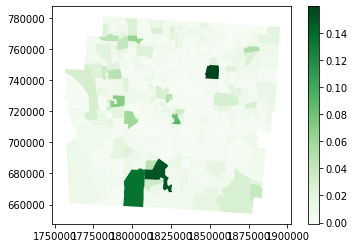

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)
gdf.plot('beta_change', cmap='Greens', ax=ax, legend = True)

# GLM model for changing beta (Gaussian)

C:\Users\armit\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


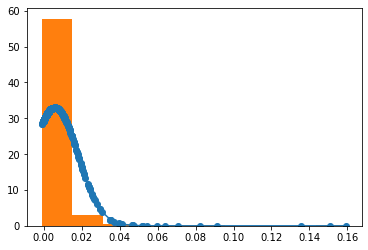

In [113]:
h = sorted(list(df3['beta_change']))  #sorted
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      #use this to draw histogram of your data

pl.show() 

In [140]:
Y = df3['beta_change'].values.reshape((-1,1))
'''X = df3[['Other Services', 'Recreation', 'Professional', 'Health_Care', 'Retail',
       'Accomodation_and_Food', 'Manufacturing', 'Finance', 'Information',
       'Public_Administration', 'Education', 'Wholesale', 'Real_Estate',
       'Transportation', 'Administrative_Services', 'Construction',
       'Utilities', 'Agriculture', 'Management_service']].values'''

X = df3[['Other Services', 'Recreation', 'Professional', 'Health_Care', 'Retail',
       'Accomodation_and_Food', 'Manufacturing', 'Finance', 'Information',
       'Public_Administration', 'Education', 'Construction']].values


model = GLM(Y, X, family=Gaussian())
results = model.fit()
results.params

'''results.pseudoR2
results.adj_pseudoR2'''

results.params
results.pvalues
results.aic

-6115.373097450482

# read data for change in flow

In [167]:
after_df = pd.read_csv(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\result\data_Mar15_Apr30_gaussian.csv')
before_df = pd.read_csv(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\result\data_Jan15_Mar14_gaussian.csv')

In [168]:
df = pd.merge(before_df, after_df, on = ['Origin', 'Destination'])

In [169]:
df['change_flow'] = df['Flow_y'] - df['Flow_x']
df['inc_less_20k_ch'] = df['inc<20k_y'] - df['inc<20k_x']
df['inc_20_50k_ch'] = df['inc20-50k_y'] - df['inc20-50k_x']
df['inc_50_100k_ch'] = df['inc50-100k_y'] - df['inc50-100k_x']
df['inc_more_100k_ch'] = df['inc>100k_y'] - df['inc>100k_x']
df['pct_hbw_ch'] = df['pct_hbw_y'] - df['pct_hbw_x']
df['pct_hbo_ch'] = df['pct_hbo_y'] - df['pct_hbo_x']
df['pct_nhb_ch'] = df['pct_nhb_y'] - df['pct_nhb_x']
df['white_ch'] = df['white_y'] - df['white_x']
df['non_white_ch'] = df['non-white_y'] - df['non-white_x']

In [170]:
df.columns
df.to_csv(r'C:\Users\armit\OneDrive - The Ohio State University\SI model\result\flow_change.csv')

In [172]:
df

,Unnamed: 0_x,Origin,Destination,Flow_x,Avg_trip_len_x,Volume_x,Duration_x,Oi_x,Dj_x,inc<20k_x,...,change_flow,inc_less_20k_ch,inc_20_50k_ch,inc_50_100k_ch,inc_more_100k_ch,pct_hbw_ch,pct_hbo_ch,pct_nhb_ch,white_ch,non_white_ch
0,0,390490001101,390490001101,29,699.000000,29.0,699.0,2463.0,2645.0,0.119,...,10,-0.003,-0.018,0.003,0.018,-0.015,0.103,-0.088,0.040,-0.040
1,1,390490001102,390490001101,28,843.480000,28.0,858.0,1259.0,2645.0,0.133,...,36,-0.007,-0.013,0.010,0.010,0.246,0.032,-0.278,0.019,-0.019
2,2,390490001103,390490001101,22,878.435897,22.0,946.0,1138.0,2645.0,0.122,...,1,0.023,-0.022,-0.026,0.025,-0.102,-0.050,0.152,-0.017,0.017
3,3,390490001104,390490001101,13,958.151515,13.0,923.0,1287.0,2645.0,0.112,...,-2,-0.014,0.009,0.021,-0.016,0.182,-0.118,-0.064,0.004,-0.004
4,4,390490001201,390490001101,55,1062.166667,55.0,1071.0,4840.0,2645.0,0.115,...,-36,0.007,-0.042,0.003,0.032,-0.071,-0.106,0.177,-0.020,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786764,786764,390490106021,390499800001,6,2900.500000,6.0,3062.0,5124.0,28473.0,0.230,...,-4,-0.107,-0.016,0.141,-0.018,0.000,-0.617,0.617,-0.149,0.149
786765,786765,390490106022,390499800001,11,2434.500000,11.0,2298.0,5492.0,28473.0,0.065,...,-8,-0.036,-0.061,0.008,0.089,0.696,-0.366,-0.330,0.054,-0.054
786766,786766,390490106023,390499800001,17,2608.965517,17.0,2712.0,3458.0,28473.0,0.121,...,-16,0.048,0.035,0.018,-0.101,0.000,0.156,-0.156,0.084,-0.084
786767,786767,390490107001,390499800001,8,2402.333333,8.0,2099.0,4872.0,28473.0,0.213,...,-3,0.005,0.061,-0.024,-0.042,-0.135,0.049,0.086,0.084,-0.084
